# LeNet-5 Implementation for Crop Disease Detection

Setting up environment

In [1]:
import os
import pandas as pd
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense, MaxPooling2D, AveragePooling2D
from keras.losses import sparse_categorical_crossentropy

In [2]:
os.chdir("D:/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train")

Retrieving relative file paths for corn, potato and tomato datasets from Google Drive

In [3]:
corn_dataset = ['Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 
                'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy']
potato_dataset = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']
tomato_dataset = ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 
                  'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 
                  'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 
                  'Tomato___healthy']

The `getDataFrom` function retrieves image data from file paths

In [4]:
def getDataFrom(labels):
    """Takes as input a list containing strings of relative filepaths. Outputs formatted dataset in the following order:
    training_data_X, training_data_Y, validation_data_X, validation_data_Y, test_data_X"""
    train_X = []
    train_Y = []
    for i, label in enumerate(labels):
        path = os.path.join("D:/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train", label).replace("\\","/")
        print("Processing:", path)
        os.chdir(path)
        image_paths = os.listdir()
        for image_path in image_paths:
            image = cv2.imread(image_path)
            try:
                image = image[::-1] # Change from BGR to RGB
            except:
                continue
            image = cv2.resize(image, (32, 32))
            train_X.append(image)
            train_Y.append(i)
    train_X = np.array(train_X)
    train_Y = np.array(train_Y)
    train_X.reshape(len(train_X), 32, 32, 3)

    valid_X = []
    valid_Y = []
    for i, label in enumerate(labels):
        path = os.path.join("D:/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid", label).replace("\\","/")
        print("Processing:", path)
        os.chdir(path)
        image_paths = os.listdir()
        for image_path in image_paths:
            image = cv2.imread(image_path)
            try:
                image = image[::-1] # Change from BGR to RGB
            except:
                continue
            image = cv2.resize(image, (32, 32))
            valid_X.append(image)
            valid_Y.append(i)
    valid_X = np.array(valid_X)
    valid_Y = np.array(valid_Y)
    valid_X.reshape(len(valid_X), 32, 32, 3)

    train_X, valid_X = train_X / 255.0, valid_X / 255.0

    return train_X, train_Y, valid_X, valid_Y

The `trainLeNet5` function takes in training data, validation data and number of epochs, and prints the accuracy of the LeNet-5 model

In [5]:
def trainLeNet5(train_X, train_Y, valid_X, valid_Y, num_epochs, num_classes, model_name):
    model = Sequential([
        Conv2D(6, kernel_size = 5, strides = 1,  activation = 'tanh', input_shape = valid_X[0].shape, padding = 'same'),
        AveragePooling2D(),
        Conv2D(16, kernel_size = 5, strides = 1, activation = 'tanh', padding = 'valid'),
        AveragePooling2D(),
        Conv2D(120, kernel_size = 5, strides = 1, activation = 'tanh', padding = 'valid'),
        Flatten(), #Flatten    
        Dense(84, activation = 'tanh'),
        Dense(num_classes, activation = 'softmax')
    ])
    model.compile(optimizer = 'adam', loss = sparse_categorical_crossentropy, metrics = ['accuracy'])

    history = model.fit(train_X, train_Y, epochs = num_epochs, verbose = 0)
    model.evaluate(valid_X, valid_Y)
    model.save(model_name)
    return history

`model_names` is a variable which stores a list of model names for the 3 crops and various epochs from 1 to 20

In [6]:
model_names = []

# Corn

In [7]:
train_X, train_Y, valid_X, valid_Y = getDataFrom(corn_dataset)

Processing: D:/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Processing: D:/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Common_rust_
Processing: D:/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Northern_Leaf_Blight
Processing: D:/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___healthy
Processing: D:/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Processing: D:/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___Common_rust_
Processing: D:/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___Northern_Leaf_Blight
Processing: D:/New Plant Diseases Dataset(Augmented)/New Plant Disea

In [8]:
crop_name = "corn"
crop_model_names = []
for num_epochs in range(1, 21):
    model_name = crop_name + str(num_epochs)
    trainLeNet5(train_X, train_Y, valid_X, valid_Y, num_epochs, len(corn_dataset), model_name)
    crop_model_names.append(model_name)
model_names.append(crop_model_names)

58/58 [==============================] - 0s 6ms/step - loss: 0.3664 - accuracy: 0.8436
INFO:tensorflow:Assets written to: corn1\assets
58/58 [==============================] - 0s 5ms/step - loss: 0.3021 - accuracy: 0.8628
INFO:tensorflow:Assets written to: corn2\assets
58/58 [==============================] - 0s 5ms/step - loss: 0.2887 - accuracy: 0.8699
INFO:tensorflow:Assets written to: corn3\assets
58/58 [==============================] - 0s 5ms/step - loss: 0.2293 - accuracy: 0.9147
INFO:tensorflow:Assets written to: corn4\assets
58/58 [==============================] - 0s 5ms/step - loss: 0.2271 - accuracy: 0.9131
INFO:tensorflow:Assets written to: corn5\assets
58/58 [==============================] - 1s 6ms/step - loss: 0.2131 - accuracy: 0.9120
INFO:tensorflow:Assets written to: corn6\assets
58/58 [==============================] - 0s 5ms/step - loss: 0.2181 - accuracy: 0.9125
INFO:tensorflow:Assets written to: corn7\assets
58/58 [==============================] - 0s 5ms/step - 

# Potato

In [9]:
train_X, train_Y, valid_X, valid_Y = getDataFrom(potato_dataset)

Processing: D:/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Potato___Early_blight
Processing: D:/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Potato___Late_blight
Processing: D:/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Potato___healthy
Processing: D:/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Potato___Early_blight
Processing: D:/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Potato___Late_blight
Processing: D:/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Potato___healthy


In [10]:
crop_name = "potato"
crop_model_names = []
for num_epochs in range(1, 21):
    model_name = crop_name + str(num_epochs)
    trainLeNet5(train_X, train_Y, valid_X, valid_Y, num_epochs, len(potato_dataset), model_name)
    crop_model_names.append(model_name)
model_names.append(crop_model_names)

45/45 [==============================] - 0s 5ms/step - loss: 0.5292 - accuracy: 0.7805
INFO:tensorflow:Assets written to: potato1\assets
45/45 [==============================] - 0s 5ms/step - loss: 0.3239 - accuracy: 0.8696
INFO:tensorflow:Assets written to: potato2\assets
45/45 [==============================] - 0s 5ms/step - loss: 0.2997 - accuracy: 0.8892
INFO:tensorflow:Assets written to: potato3\assets
45/45 [==============================] - 0s 5ms/step - loss: 0.2237 - accuracy: 0.9109
INFO:tensorflow:Assets written to: potato4\assets
45/45 [==============================] - 0s 5ms/step - loss: 0.2277 - accuracy: 0.9173
INFO:tensorflow:Assets written to: potato5\assets
45/45 [==============================] - 0s 5ms/step - loss: 0.2158 - accuracy: 0.9116
INFO:tensorflow:Assets written to: potato6\assets
45/45 [==============================] - 0s 5ms/step - loss: 0.1622 - accuracy: 0.9390
INFO:tensorflow:Assets written to: potato7\assets
45/45 [==============================] - 

# Tomato

In [11]:
train_X, train_Y, valid_X, valid_Y = getDataFrom(tomato_dataset)

Processing: D:/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot
Processing: D:/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight
Processing: D:/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight
Processing: D:/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold
Processing: D:/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot
Processing: D:/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite
Processing: D:/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot
Processing: D:/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus
Proc

In [12]:
crop_name = "tomato"
crop_model_names = []
for num_epochs in range(1, 21):
    model_name = crop_name + str(num_epochs)
    trainLeNet5(train_X, train_Y, valid_X, valid_Y, num_epochs, len(tomato_dataset), model_name)
    crop_model_names.append(model_name)
model_names.append(crop_model_names)

144/144 [==============================] - 1s 5ms/step - loss: 1.0589 - accuracy: 0.6324
INFO:tensorflow:Assets written to: tomato1\assets
144/144 [==============================] - 1s 5ms/step - loss: 0.7760 - accuracy: 0.7375
INFO:tensorflow:Assets written to: tomato2\assets
144/144 [==============================] - 1s 6ms/step - loss: 0.6958 - accuracy: 0.7658
INFO:tensorflow:Assets written to: tomato3\assets
144/144 [==============================] - 1s 5ms/step - loss: 0.6443 - accuracy: 0.7791
INFO:tensorflow:Assets written to: tomato4\assets
144/144 [==============================] - 1s 5ms/step - loss: 0.5764 - accuracy: 0.8020
INFO:tensorflow:Assets written to: tomato5\assets
144/144 [==============================] - 1s 5ms/step - loss: 0.5647 - accuracy: 0.8109
INFO:tensorflow:Assets written to: tomato6\assets
144/144 [==============================] - 1s 5ms/step - loss: 0.4850 - accuracy: 0.8349
INFO:tensorflow:Assets written to: tomato7\assets
144/144 [==================

# Evaluating accuracy

In [13]:
train_X, train_Y, valid_X, valid_Y = getDataFrom(corn_dataset)
corn_accuracy = [(i, load_model("corn" + str(i)).evaluate(valid_X, valid_Y)[1]) for i in range(1, 21)]
train_X, train_Y, valid_X, valid_Y = getDataFrom(potato_dataset)
potato_accuracy = [(i, load_model("potato" + str(i)).evaluate(valid_X, valid_Y)[1]) for i in range(1, 21)]
train_X, train_Y, valid_X, valid_Y = getDataFrom(tomato_dataset)
tomato_accuracy = [(i, load_model("tomato" + str(i)).evaluate(valid_X, valid_Y)[1]) for i in range(1, 21)]

Processing: D:/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Processing: D:/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Common_rust_
Processing: D:/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___Northern_Leaf_Blight
Processing: D:/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Corn_(maize)___healthy
Processing: D:/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
Processing: D:/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___Common_rust_
Processing: D:/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/Corn_(maize)___Northern_Leaf_Blight
Processing: D:/New Plant Diseases Dataset(Augmented)/New Plant Disea

144/144 [==============================] - 2s 10ms/step - loss: 0.4567 - accuracy: 0.8565


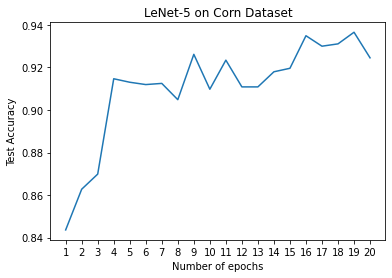

In [14]:
plt.plot([score[0] for score in corn_accuracy], [score[1] for score in corn_accuracy])
plt.xlabel("Number of epochs")
plt.ylabel("Test Accuracy")
plt.title("LeNet-5 on Corn Dataset")
plt.xticks([i for i in range(1, 21)])
plt.show()

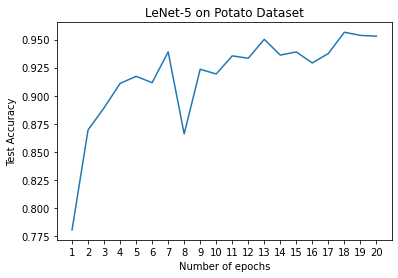

In [15]:
plt.plot([score[0] for score in potato_accuracy], [score[1] for score in potato_accuracy])
plt.xlabel("Number of epochs")
plt.ylabel("Test Accuracy")
plt.title("LeNet-5 on Potato Dataset")
plt.xticks([i for i in range(1, 21)])
plt.savefig("corn_test_acc")
plt.show()

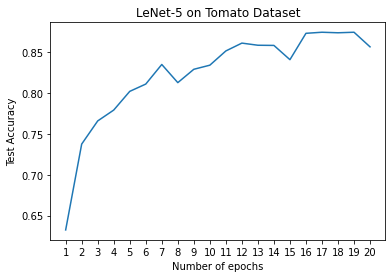

In [16]:
plt.plot([score[0] for score in tomato_accuracy], [score[1] for score in tomato_accuracy])
plt.xlabel("Number of epochs")
plt.ylabel("Test Accuracy")
plt.title("LeNet-5 on Tomato Dataset")
plt.xticks([i for i in range(1, 21)])
plt.show()

In [17]:
print("10 Epochs Corn Accuracy: " + str(round(corn_accuracy[9][1] * 100, 2)) + "%")
print("12 Epochs Corn Accuracy: " + str(round(corn_accuracy[11][1] * 100, 2)) + "%")
print("20 Epochs Corn Accuracy: " + str(round(corn_accuracy[19][1] * 100, 2)) + "%")

10 Epochs Corn Accuracy: 90.98%
12 Epochs Corn Accuracy: 91.09%
20 Epochs Corn Accuracy: 92.45%


In [18]:
print("10 Epochs Potato Accuracy: " + str(round(potato_accuracy[9][1] * 100, 2)) + "%")
print("12 Epochs Potato Accuracy: " + str(round(potato_accuracy[11][1] * 100, 2)) + "%")
print("20 Epochs Potato Accuracy: " + str(round(potato_accuracy[19][1] * 100, 2)) + "%")

10 Epochs Potato Accuracy: 91.94%
12 Epochs Potato Accuracy: 93.34%
20 Epochs Potato Accuracy: 95.3%


In [19]:
print("10 Epochs Tomato Accuracy: " + str(round(tomato_accuracy[9][1] * 100, 2)) + "%")
print("12 Epochs Tomato Accuracy: " + str(round(tomato_accuracy[11][1] * 100, 2)) + "%")
print("20 Epochs Tomato Accuracy: " + str(round(tomato_accuracy[19][1] * 100, 2)) + "%")

10 Epochs Tomato Accuracy: 83.41%
12 Epochs Tomato Accuracy: 86.11%
20 Epochs Tomato Accuracy: 85.65%
